In [1]:
from keras.datasets import boston_housing
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(train_data, train_targets),(test_data,test_targets) = boston_housing.load_data()

In [3]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop',
                 loss='mse',
                 metrics=['mae'])
    return model

In [5]:
k = 4
num_val_samples = len(train_data) // 4
num_epochs = 100
all_mae_histories = []

for i in range(k):
    print('처리중인 폴드 #',i+1)
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples] #검증 데이터 준비
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], #훈련 데이터 준비, 다른 분할 전체
                                           train_data[(i+1)*num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],
                                           train_targets[(i+1)*num_val_samples:]], axis=0)
    
    model = build_model() #모델 구성
    
    history = model.fit(partial_train_data, 
                        partial_train_targets,
                        validation_data = (val_data, val_targets),
                        epochs = num_epochs, 
                        batch_size=1, 
                        verbose=0) #verbose = 0 훈련과정 출력x
    
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 1
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
처리중인 폴드 # 2
처리중인 폴드 # 3
처리중인 폴드 # 4


In [6]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

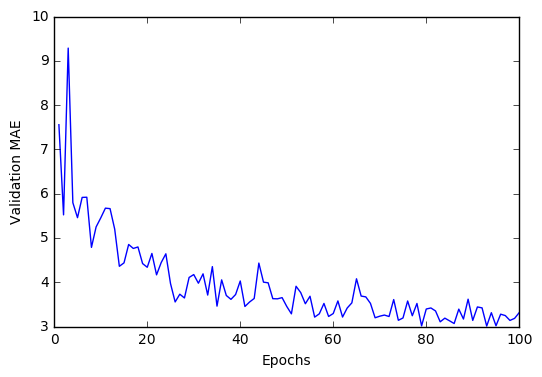

In [7]:
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [9]:
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

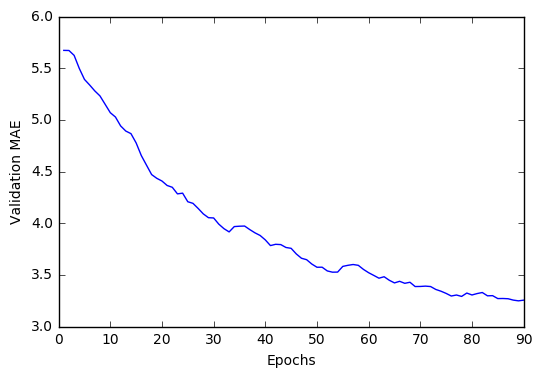

In [10]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1,len(smooth_mae_history)+1),smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()